# Examples of the Paper: Superposition of Quantum Gaussian Processes

In [1]:
%reload_ext autoreload

import numpy as np 
import matplotlib.pyplot as plt
import math as math 
import cmath as cmath
from scipy import linalg as linalg
from scipy import integrate as integ
from scipy.integrate import solve_ivp
from scipy import special as special
from scipy import optimize as optimize

from matplotlib import cm
from matplotlib import rcParams
from matplotlib import colors


import sys
import os
sys.path.append(os.path.abspath('../src'))

from Objects import Quantum_State, Hamiltonian, Symplectic, Decoherence
import QIT_Functions as QIT_Functions
import Gaussian as Gaussian


# Example 2: Diffusive Dynamics of Stern Gerlach 
# Intereferometer with Squeezed Thermal State

## Numerical

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


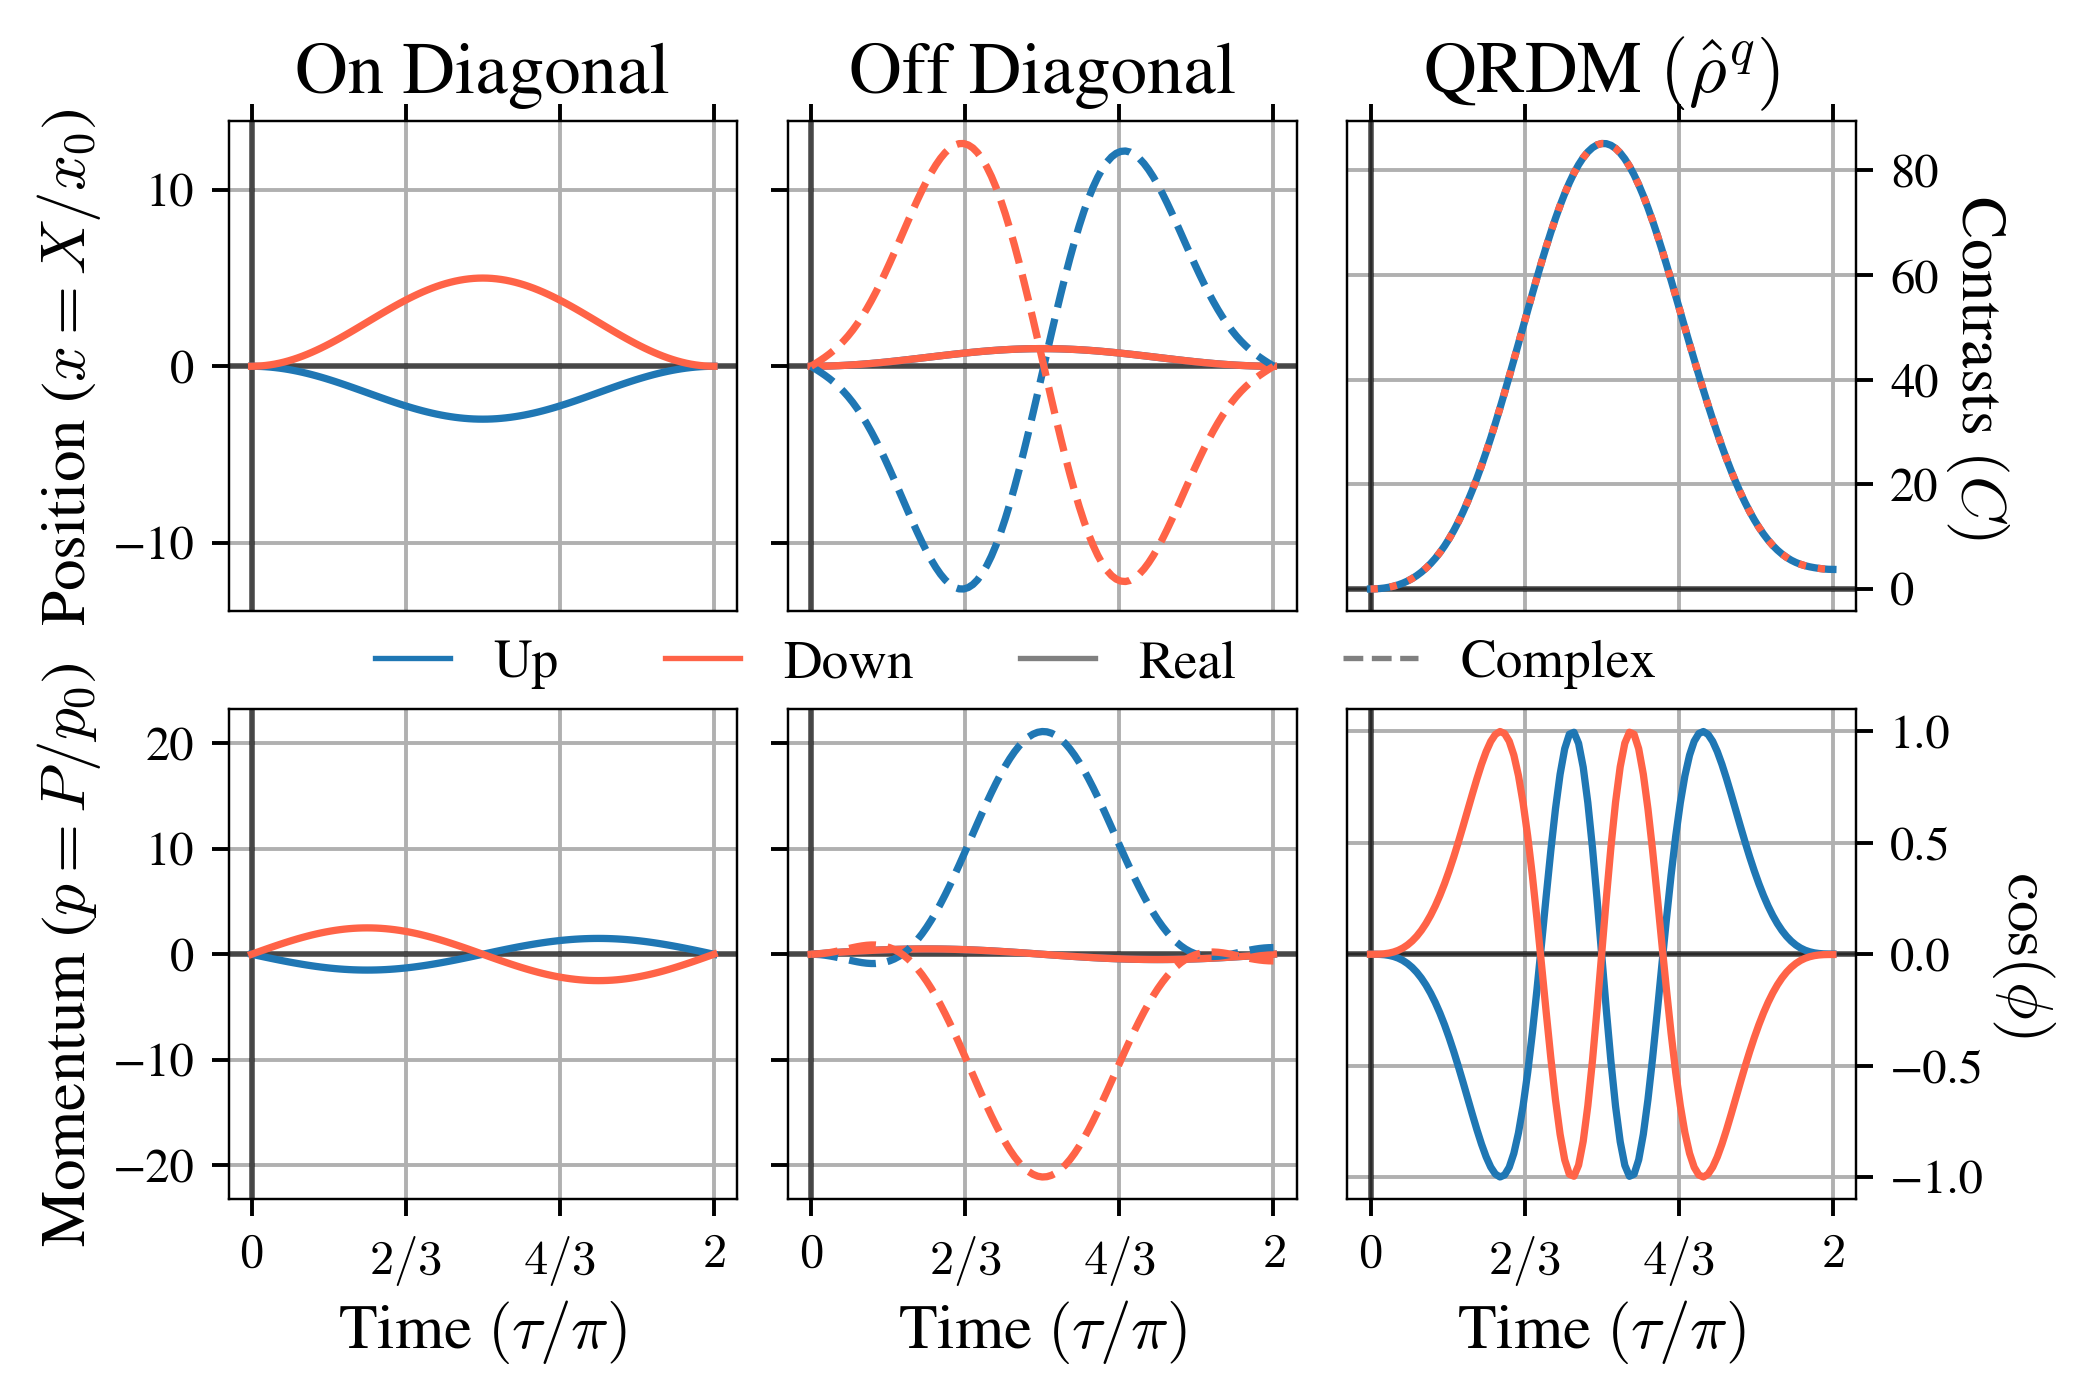

In [2]:
f_q = 2.0 # Force Qubits
f_u = 0.5 # Unkown Force

N0 = 0.8 # Number of Photons 
s = 0.5 # Squeezing Parameter

gamma_x = 0.05 # Decoherence Rate Position
gamma_s = 0.05 # Decoherence Rate Qubit


N_qubits = 1
n_modes = 1

sigma_0 = (1+2*N0)*np.array([[s,0],[0,1/s]])
r_0 = np.array([[0.0],
                [0.0]])
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(N_qubits))

B_mat =  gamma_x*np.array([[1.,0.],[0.,0.]])
Dec = Decoherence(N_qubits ,n_modes,'Canonical', B_mat)

########################## Hamiltonian ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m = f_u*np.array([[1.0],[0.0]])
H_q = H_null
r_q =f_q*np.array([[1.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])

H_1_general.Initialize_Constant_Hamiltonians([H_m,H_q], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100+1)

GCS.Open_Dynamics_Numerical(H_1_general, Dec, t_array)

########################## Plot First Moments ##########################

Parameter_list = []
array_pi = np.linspace(0,2,4)

GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);



## Animation of Wigner Functions

/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/lorenzobraccini/General Gaussian Method copy/src/Wigner_Functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  W_Diag[m,n] += (2**n_modes)*rho_q[i,i]/(np.pi**n_modes * np.sqrt(det_sigma))*np.exp(-np.transpose(r_tilde_array[m,n] - r_JK[i,i])@sigma_inv@(r_tilde_array[m,n] - r_JK[i,i]))[0,0]


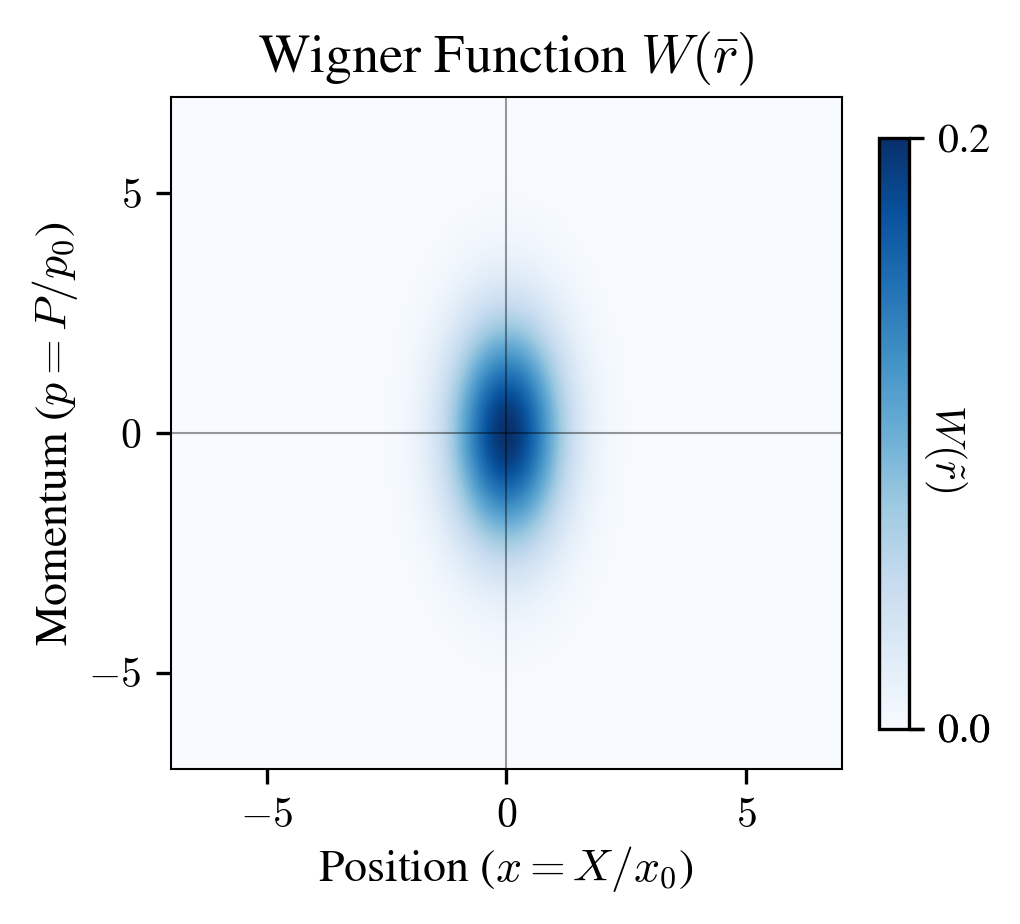

In [3]:
steps = 101
mode_number = 0
time_index = 40
bar_limits = [0,0.5]
sigma_para = 0.6
array_tick = np.linspace(-5,5,3)
n_frames = len(GCS.t_array)

GCS.Animate_Wigner_Function_Diag(steps, mode_number, sigma_para, array_tick, n_frames, False)

/Users/lorenzobraccini/General Gaussian Method copy/src/Measurements.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_t[i,j] = np.trace(rho_q_PMS_unnormalize)
/Users/lorenzobraccini/General Gaussian Method copy/src/Measurements.py:62: RuntimeWarning: invalid value encountered in divide
  rho_q_t_PMS_array[i,j] = rho_q_PMS_unnormalize/prob_t[i,j]
/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


1.0000000000000002


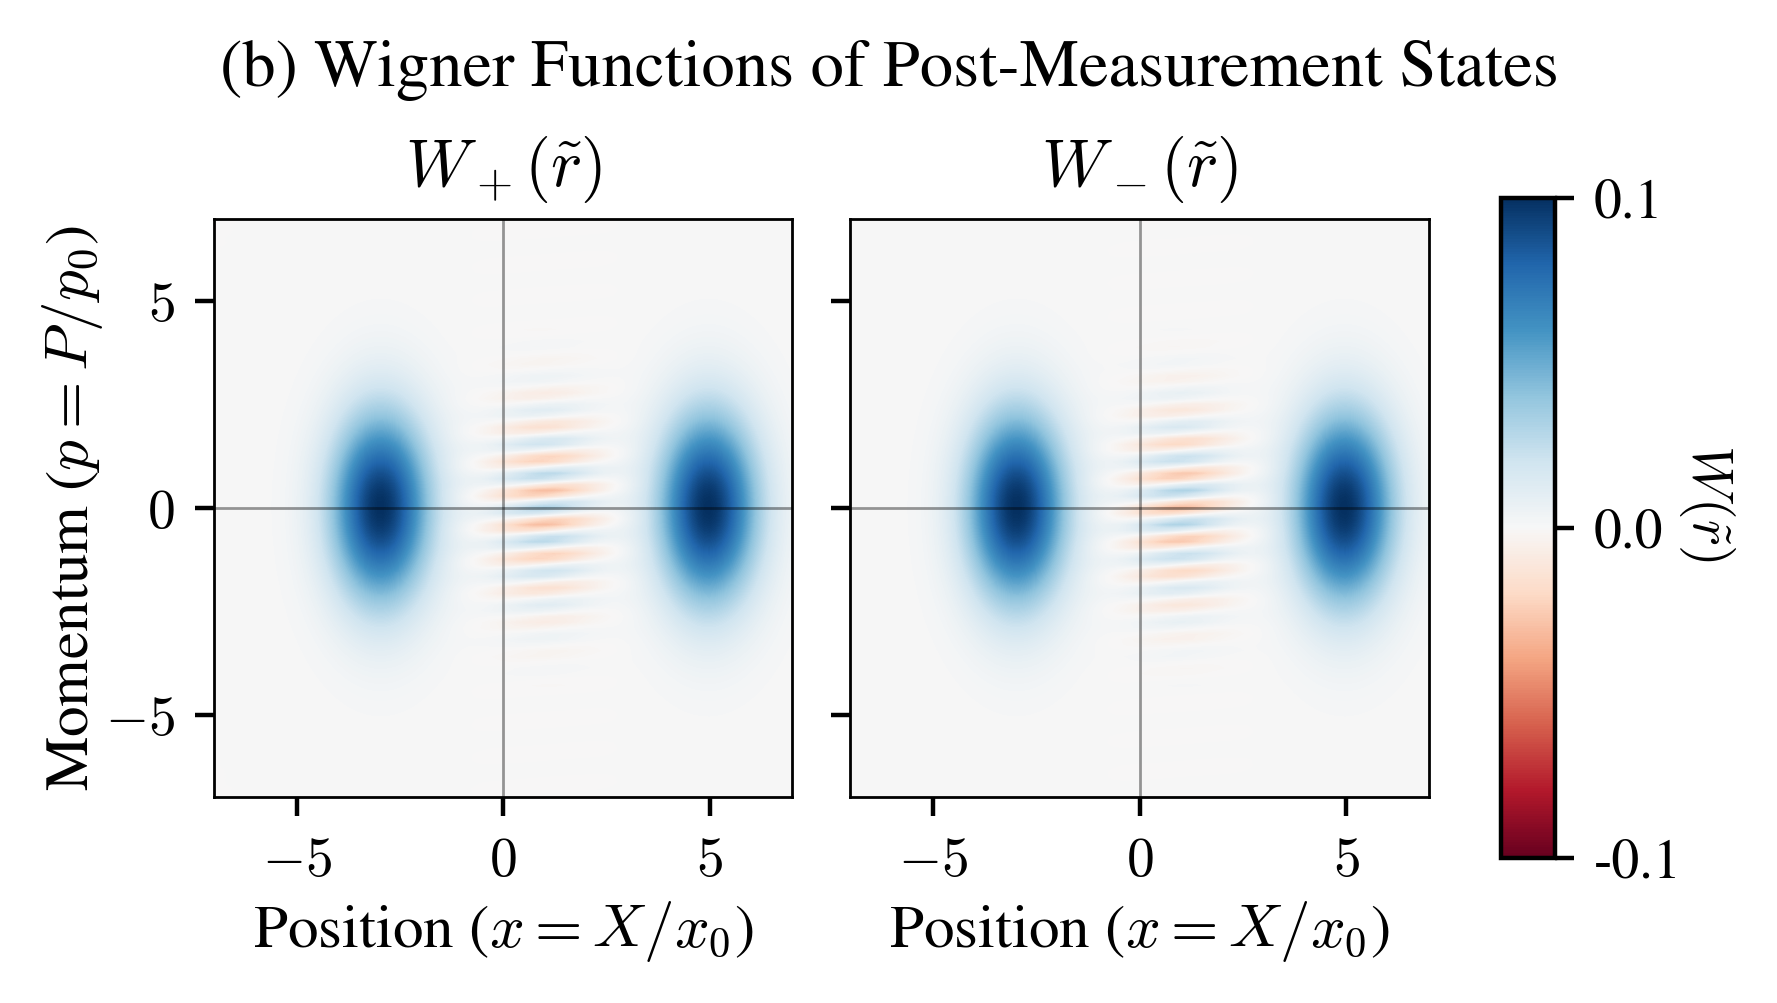

In [4]:
sigma_x = np.array([[0,1],[1,0]])/2 
steps = 101
mode_number = 0
time_index = 50
bar_limits = [0,0.5]
sigma_para = 0.7
n_frames = len(GCS.t_array)
array_tick = np.linspace(-5,5,3)
GCS.Qubit_Ideal_Measurament(sigma_x, 'Time')


print(t_array[time_index]/np.pi)


GCS.Plot_Wigner_Function_PMS(steps, time_index, mode_number, sigma_para, array_tick, False)


## Analytical Results

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


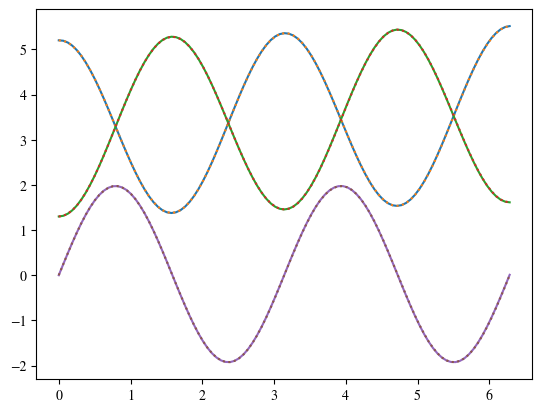

In [5]:
def Cov_Analytical(t, s, n_p, Gamma_x):
    term1 = (1+2*n_p)*np.array([[s*np.cos(t)**2 + np.sin(t)**2/s,(1/s-s)*np.cos(t)*np.sin(t)],
                                [(1/s-s)*np.cos(t)*np.sin(t),s*np.sin(t)**2 + np.cos(t)**2/s]])
    
    term2 = Gamma_x*np.array([[t - np.cos(t)*np.sin(t),np.sin(t)**2],
                               [np.sin(t)**2,t + np.cos(t)*np.sin(t)]])
    return term1+term2

Cov_array = Cov_Analytical(t_array, s, N0, gamma_x)

plt.plot(t_array, GCS.sigma_JK_t[:,1,0,1,1])
plt.plot(t_array, Cov_array[1,1], ':')
plt.plot(t_array, GCS.sigma_JK_t[:,1,0,0,0])
plt.plot(t_array, Cov_array[0,0], ':')
plt.plot(t_array, GCS.sigma_JK_t[:,1,0,1,0])
plt.plot(t_array, Cov_array[0,1], ':')

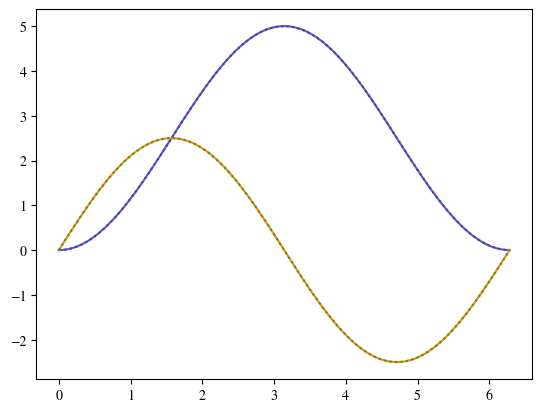

In [6]:
def r_minus(tau, f_q, f_u):

    cos_tau = np.cos(tau)
    sin_tau = np.sin(tau)

    # First component
    first_component = -(cos_tau - 1) 

    # Second component
    second_component = sin_tau 

    # Assemble vector
    vector =  (- f_q + f_u)* np.array([first_component, second_component])
    return vector


def r_plus(tau, f_q, f_u):

    cos_tau = np.cos(tau)
    sin_tau = np.sin(tau)

    # First component
    first_component = -(cos_tau - 1) 

    # Second component
    second_component = sin_tau 

    # Assemble vector
    vector =  (f_q + f_u) * np.array([first_component, second_component])
    return vector


r_minus_array = r_minus(t_array, f_q, f_u)
r_plus_array = r_plus(t_array, f_q, f_u)


plt.plot(t_array, GCS.r_JK_t[:,1,1,0])
plt.plot(t_array, r_plus_array[0,:], ':',color='m')
plt.plot(t_array, GCS.r_JK_t[:,1,1,1])
plt.plot(t_array, r_plus_array[1,:], ':')

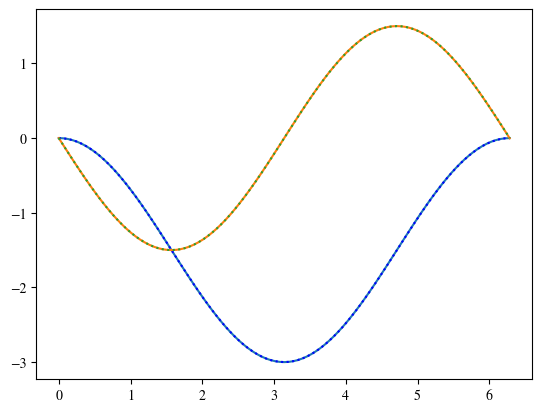

In [7]:
plt.plot(t_array, GCS.r_JK_t[:,0,0,0])
plt.plot(t_array, r_minus_array[0,:], ':',color='b')
plt.plot(t_array, GCS.r_JK_t[:,0,0,1])
plt.plot(t_array, r_minus_array[1,:], ':')

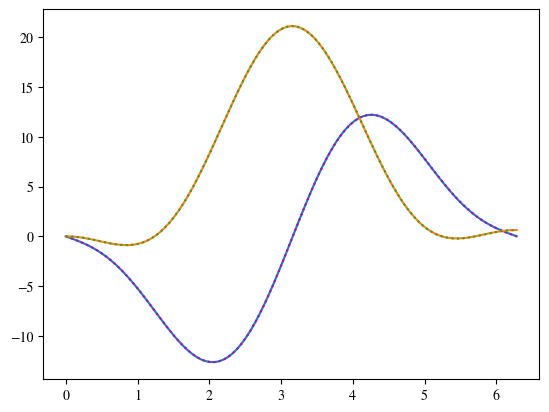

In [8]:
def r_off(t, s,  fq, f_u, n_p, gamma_x):
    
    real = f_u*np.array([[1 - np.cos(t)],
                        [np.sin(t)]])
    
    complex1 = (1+2*n_p)*np.array([[np.sin(t)*((1/s-s)*np.cos(t) - 1/s)],
                                 [2*np.sin(t/2)**2*(s + (s-1/s)*np.cos(t))]])
    
    complex2 = gamma_x*np.array([[-4*np.sin(t/2)**4],
                                [t + np.sin(t)*(np.cos(t) - 2)]])

    return real+1j*fq*(complex1+complex2)

r_off_array = r_off(t_array, s,  f_q, f_u, N0, gamma_x)

plt.plot(t_array, np.imag(GCS.r_JK_t[:,0,1,0]))
plt.plot(t_array, np.imag(r_off_array[0,0,:]), ':',color='m')
plt.plot(t_array, np.imag(GCS.r_JK_t[:,0,1,1]))
plt.plot(t_array, np.imag(r_off_array[1,0,:]), ':')

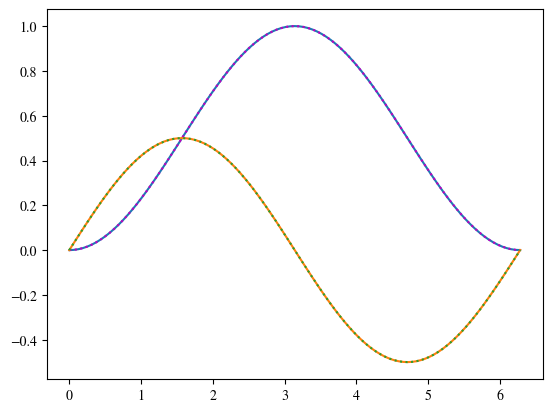

In [9]:
plt.plot(t_array, np.real(GCS.r_JK_t[:,0,1,0]))
plt.plot(t_array, np.real(r_off_array[0,0,:]), ':',color='m')
plt.plot(t_array, np.real(GCS.r_JK_t[:,0,1,1]))
plt.plot(t_array, np.real(r_off_array[1,0,:]), ':')

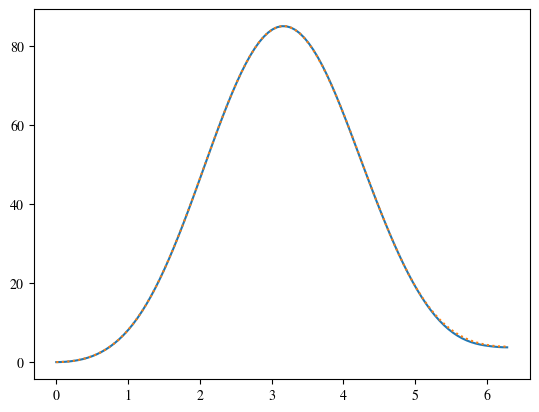

In [10]:
def C_anlytical(t, fq, s, np_val, gamma_x, gamma_z):    

    term1 = 2*(2 * np_val + 1)*np.sin(t/2)**2*((s - 1/s)*np.cos(t) +s + 1/s)
    term2 = gamma_x*(3*t+ np.sin(t)*(np.cos(t)-4))
    term3 = gamma_z*t/2

    return fq**2*(term1 + term2) + term3

C_array = C_anlytical(t_array, f_q, s, N0, gamma_x, gamma_s)
plt.plot(t_array, GCS.C_JK_t[:,1,0])
plt.plot(t_array, C_array, ':')

## Plots Examples 2

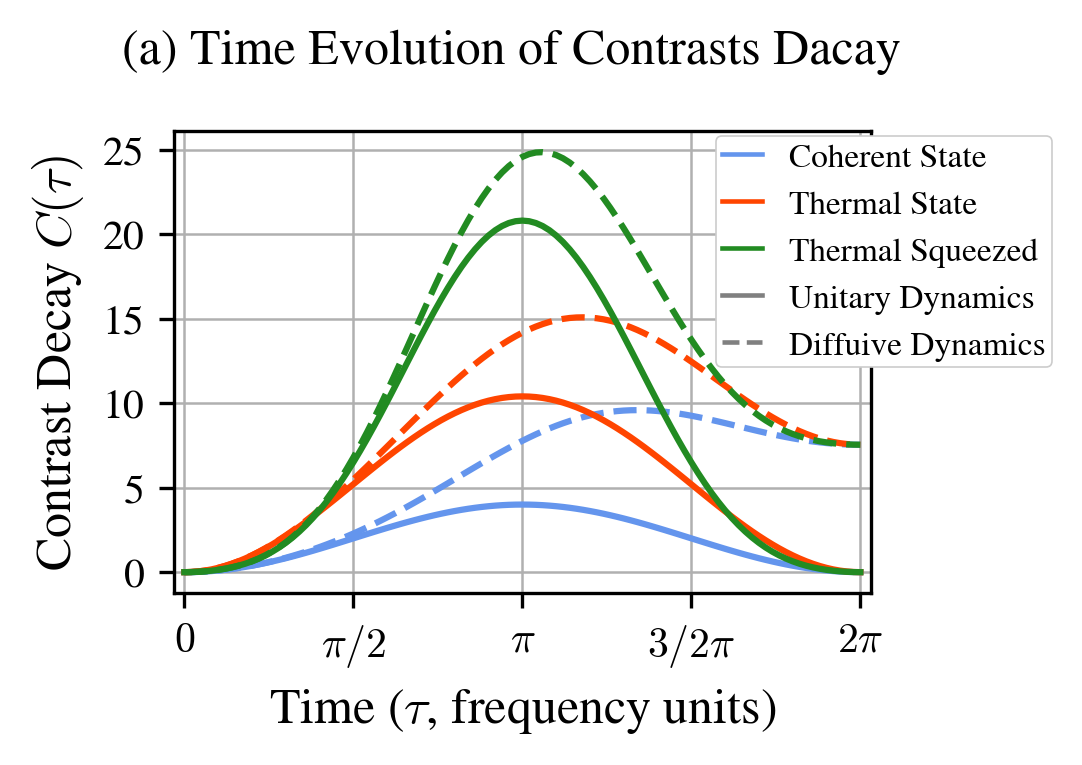

In [11]:
f_q = 1
gamma_x= 2



def plot_contrasts(t_array, save):
    """
    Plot entanglement (y axis) against time (x axis) for different spins both parallel and perpendicular setup:
    Inputs:
    time_array             Array of times 
    time_evolution_perp    matrix of entanglement perpendicolar (dim = len(spins) x len(time_array))
    time_evolution_para    matrix of entanglement parallel (dim = len(spins) x len(time_array))
    spins                  List of spins (Js)
    title                  Title of the plot
    yaxis                  Y axis label
    save                   If False doesn't save, otherwise string of figure save 
    Return: 
    """
    fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi = 300)
    
    colors_green = ['lightgreen', 'limegreen' , 'forestgreen', 'green', 'darkgreen']
    colors_blue = ['lightskyblue','cornflowerblue', 'royalblue', 'blue','darkblue']
    colors_red = ['salmon','tomato','orangered','red','darkred']
    
    
    rcParams['mathtext.fontset'] = 'cm'
    rcParams['font.family'] = 'STIXGeneral'

    dephasing = 0.8
    diffusion = 0.4

    C_array = C_anlytical(t_array, f_q, 1, 0, 0,0)
    ax.plot(t_array, C_array, color=colors_blue[1], linestyle='-')

    C_array = C_anlytical(t_array, f_q, 1, 0, 0.0, dephasing)
    #ax.plot(t_array, C_array, color=colors_blue[1], linestyle='--')
    
    C_array = C_anlytical(t_array, f_q, 1, 0, diffusion,0)
    ax.plot(t_array, C_array, color=colors_blue[1], linestyle='--')



    C_array = C_anlytical(t_array, f_q, 1, 0.8, 0,0)
    ax.plot(t_array, C_array, color=colors_red[2], linestyle='-')

    C_array = C_anlytical(t_array, f_q, 1, 0.8, 0.0, dephasing)
    #ax.plot(t_array, C_array, color=colors_red[2], linestyle='--')
    
    C_array = C_anlytical(t_array, f_q, 1, 0.8, diffusion, 0)
    ax.plot(t_array, C_array, color=colors_red[2], linestyle='--')



    C_array = C_anlytical(t_array, f_q, 0.5, 0.8, 0, 0)
    ax.plot(t_array, C_array, color=colors_green[2], linestyle='-')
    
    C_array = C_anlytical(t_array, f_q, 0.5, 0.8, 0.0, dephasing)
    #ax.plot(t_array, C_array, color=colors_green[2], linestyle='--')
    
    C_array = C_anlytical(t_array, f_q, 0.5, 0.8, diffusion, 0)
    ax.plot(t_array, C_array, color=colors_green[2], linestyle='--')

    ax.plot([-0.2,-0.3], [1,1], '-', color=colors_blue[1], label=r'Coherent State')
    ax.plot([-0.2,-0.3], [1,1], '-', color=colors_red[2], label=r'Thermal State')
    ax.plot([-0.2,-0.3], [1,1], '-', color=colors_green[2], label=r'Thermal Squeezed')

    
    #ax.plot([-0.2,-0.3], [1,1], '-', color='gray', label=r'Diffuive dynamics')
    ax.plot([-0.2,-0.3], [1,1], '-', color='gray', label=r'Unitary Dynamics')
    ax.plot([-0.2,-0.3], [1,1], '--', color='gray', label=r'Diffuive Dynamics')
    
    
    

    #ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5], minor=False)
    #ax.set_yticklabels([r'$0$',r'$0.1$', r'$0.2$',r'$0.3$',r'$0.4$', r'$0.5$'], fontsize=10)
    #ax.set_yticklabels([r'$0$', r'$0.5$'], fontsize=10)
    
    #ax.axvline(x = g_grav, color=colors_red[2], label= r'$g_G \approx 10^{%.0f} $' % orderOfMagnitude(g_grav),linewidth=1.2  )
    #ax.axhline(y = 0, color='black', zorder = 11 ,linewidth=1.3)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.grid(zorder=0, linewidth=0.6)
    ax.set_xlim(-0.1, 2*np.pi+0.1)
    #ax.set_ylim(-0.05, 0.55)
    ax.set_ylabel(r'Contrast Decay $C(\tau)$', fontsize=12)
    ax.set_xlabel(r'Time ($\tau$, frequency units)', fontsize=12)
    ax.set_axisbelow(True)

    ax.set_yticks([0,5, 10,15,20,25] )
    ax.set_xticks([0, 1/2*np.pi, np.pi,3/2*np.pi, 2*np.pi] )
    ax.set_xticklabels([r'$0$',r'$\pi/2$', r'$\pi$',r'$3/2 \pi$',r'$2 \pi$'])
    fig.suptitle('(a) Time Evolution of Contrasts Dacay', y =1.05)

    handles, labels = ax.get_legend_handles_labels()
    leg =fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 0.9), fontsize=8,labelspacing=0.5,handlelength=1.2,borderpad=0.2,ncols=1)
    for line in leg.get_lines():
        line.set_linewidth(1.1)
    leg.get_frame().set_linewidth(0.4)
    leg.get_frame().set_alpha(None)
    leg.get_frame().set_facecolor((1, 1, 1, 1.))
    
    if save == False:
        return 
    else: 
        plt.savefig(save, bbox_inches='tight')
        return
    
plot_contrasts(t_array, False)

# Example 1: Measurament-Based Entanglment between Two Atoms via a Cavity undergoing Homodyne Detection

## Numerical Results

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


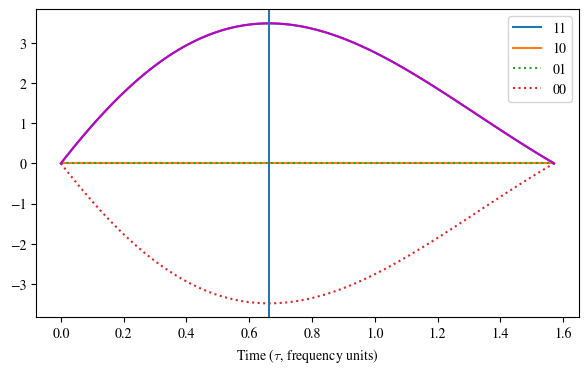

In [12]:
def simultaion_1(omega, chi, kappa, x0,s, t_array):

    N_qubits = 2
    n_modes = 1

    H_m = omega*np.eye(2)
    H_q_1 =  chi*np.eye(2)/2
    H_q_2 =  chi*np.eye(2)/2

    r_null = np.zeros((2*n_modes,1)) 

    H_q_0_array = np.array([0 +0*1j,0 +0*1j])
    
    r_m = r_null
    r_q = r_null

    H_q_0_array = np.array([0 +0*1j,0 +0*1j])

    H_1_general = Hamiltonian(N_qubits, n_modes)
    H_1_general.Initialize_Constant_Hamiltonians([H_m, H_q_1, H_q_2], [r_m, r_q, r_q], H_q_0_array)

    r_0 = np.array([[x0],[0]])
    sigma_0 = np.array([[s,0],[0,1/s]])
    rho_q_0 = np.ones((2*N_qubits,2*N_qubits), dtype = np.complex128)/(2**(N_qubits))

    gaussian_state_general = Quantum_State(N_qubits, n_modes)
    gaussian_state_general.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

    ########################## Dynamics ##########################


    Dec = Decoherence(N_qubits ,n_modes,'Canonical', kappa*(np.eye(2)-1j*Gaussian.Omega_N(1))/2 )

    gaussian_state_general.Open_Dynamics_Numerical(H_1_general, Dec, t_array)

    return gaussian_state_general

omega = 0
chi = 2.0
kappa = 1
t_array = np.linspace(0,np.pi,101)/chi

x0 = 5
s = 1/2

GCS = simultaion_1(omega, chi, kappa, x0,s, t_array)

#optimal_index = np.argmax(np.abs(GCS.r_JK_t[:,0,0,2]- GCS.r_JK_t[:,1,1,2]))

fig, ax = plt.subplots(1, 1, figsize=(7,4))

index = 1

ax.plot(t_array,GCS.r_JK_t[:,0,0,index],label= '11')
ax.plot(t_array,GCS.r_JK_t[:,1,1,index], label='10')
ax.plot(t_array,GCS.r_JK_t[:,2,2,index], ':',label='01')
ax.plot(t_array,GCS.r_JK_t[:,3,3,index], ':', label='00')

ax.plot(t_array,x0*np.exp(-kappa*t_array/2)*np.sin(chi*t_array), color='m')

ax.axvline(x=np.arctan(2*chi/kappa)/chi)


ax.set_xlabel(r'Time ($\tau$, frequency units)')
ax.legend()

    

## Animation of Wigner Functions

/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/lorenzobraccini/General Gaussian Method copy/src/Wigner_Functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  W_Diag[m,n] += (2**n_modes)*rho_q[i,i]/(np.pi**n_modes * np.sqrt(det_sigma))*np.exp(-np.transpose(r_tilde_array[m,n] - r_JK[i,i])@sigma_inv@(r_tilde_array[m,n] - r_JK[i,i]))[0,0]


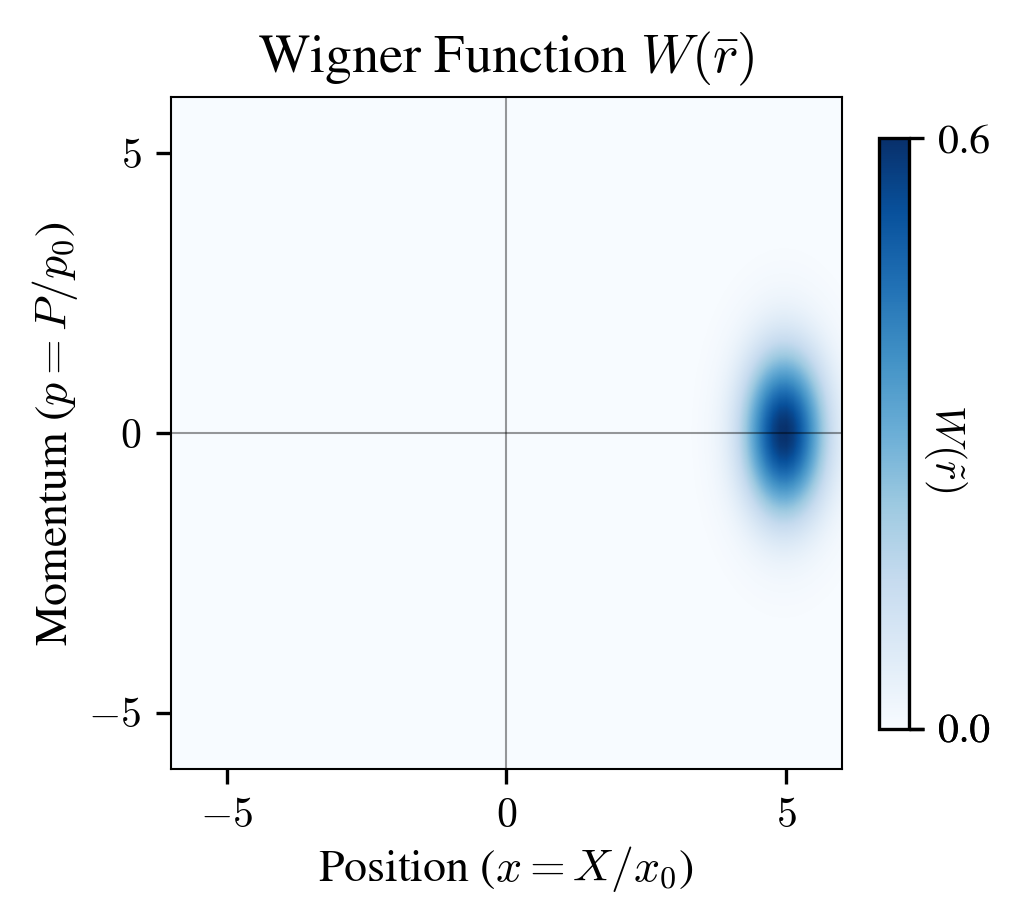

In [13]:
steps = 101
mode_number = 0
time_index = 40
bar_limits = [0,0.5]
sigma_para = 0.9
array_tick = np.linspace(-5,5,3)
n_frames = len(GCS.t_array)


#gaussian_state_general.Plot_Wigner_Function_Diag(steps,time_index, mode_number,sigma_para,array_tick,False)

GCS.Animate_Wigner_Function_Diag(steps, mode_number, sigma_para, array_tick, n_frames, False)

## Analytical Results

/var/folders/gf/stjx7_gd7x54p6_0r6fskqbr0000gn/T/ipykernel_96020/1170185060.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_e_numerical[i] = sigma_even_numerical(GCS, eta, i)
/var/folders/gf/stjx7_gd7x54p6_0r6fskqbr0000gn/T/ipykernel_96020/1170185060.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_o_numerical[i] = sigma_odd_numerical(GCS, eta, i)


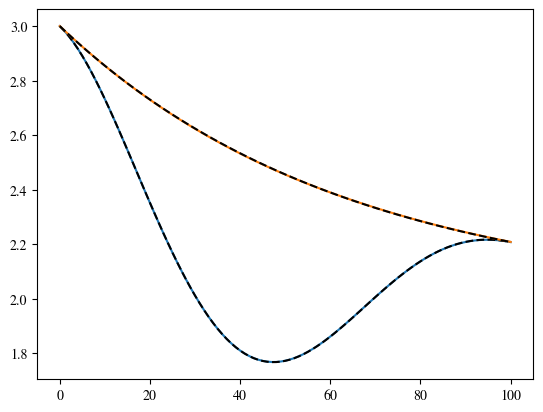

In [14]:
def sigma_odd(s, chi,kappa,eta, t):
    return (s+ np.exp(-kappa*t)*(1 - s)*eta)/(s*eta)

def sigma_even(s, chi,kappa,eta, t):
    return (s+ np.exp(-kappa*t)*(np.cos(chi*t)**2 - s+s**2*np.sin(chi*t)**2)*eta)/(s*eta)

def sigma_even_numerical(GCS,eta, t_index):
    z = 10**(5)
    theta = np.arccos(np.sqrt(eta))
    sigma_state = GCS.sigma_JK_t[t_index,0,0]
    sigma_e = linalg.inv(sigma_state + np.tan(theta)**2*np.eye(2) + np.array([[z**2,0],[0,1/z**2]]))
    return sigma_e

def sigma_odd_numerical(GCS,eta, t_index):
    z = 10**(5)
    theta = np.arccos(np.sqrt(eta))
    sigma_state = GCS.sigma_JK_t[t_index,1,1]
    sigma_e = linalg.inv(sigma_state + np.tan(theta)**2*np.eye(2) + np.array([[z**2,0],[0,1/z**2]]))
    return sigma_e


index = np.array([1,10,20,30])

eta = 0.5

sigma_e_analytical = np.zeros(len(t_array))
sigma_e_numerical = np.zeros((len(t_array),2,2))
sigma_o_analytical = np.zeros(len(t_array))
sigma_o_numerical = np.zeros((len(t_array),2,2))

for i in range(len(t_array)):
    sigma_e_numerical[i] = sigma_even_numerical(GCS, eta, i)
    sigma_e_analytical[i] = sigma_even(s, chi,kappa,eta, t_array[i])
    sigma_o_numerical[i] = sigma_odd_numerical(GCS, eta, i)
    sigma_o_analytical[i] = sigma_odd(s, chi,kappa,eta, t_array[i])


plt.plot(1/sigma_e_numerical[:,1,1])
plt.plot(sigma_e_analytical,'--', color='black')

plt.plot(1/sigma_o_numerical[:,1,1])
plt.plot(sigma_o_analytical,'--', color='black')



## Plots Examples 1

In [15]:
def Partial_Transpose_Dense(rho, mask, dimensions_list):
        """Computes the Partial Transposition"""

        dims = [dimensions_list, dimensions_list]
        nsys = len(mask)
        pt_dims = np.arange(2 * nsys).reshape(2, nsys).T
        pt_idx = np.concatenate([[pt_dims[n, mask[n]] for n in range(nsys)],
                                [pt_dims[n, 1 - mask[n]] for n in range(nsys)]])

        partial_transpose = rho.reshape(
            np.array(dims).flatten()).transpose(pt_idx).reshape(rho.shape)

        return partial_transpose

def Negativity_Qubits(rho):
        """Compute the witness (PPT) both as value (given the state) and as operator """
        J = (len(rho)-1)/4 
        dim = int(2*J+1)
        dimensions_list = [dim,dim]
        mask = [0,1]
        
        rho_pt = Partial_Transpose_Dense(rho, mask, dimensions_list)
        
        eva, eve = linalg.eig(rho_pt)
        eve = np.transpose(eve)
        
        nega = 0
        witness_matrix = np.zeros((dim**2, dim**2),dtype =np.complex128)
        
        for i in range(len(eva)):
            num = 0
            if eva[i] < 0:
                nega += eva[i]
                witness_matrix += np.outer(eve[i], np.conj(eve[i].T))
                num += 1
        
        witness_matrix = Partial_Transpose_Dense(witness_matrix, mask, dimensions_list)
        return nega, witness_matrix


In [16]:
omega = 0
chi = 1
kappa = 3
x0 = 20
eta =0.6
s_array = np.array([1/20,1/10,1,10,50])
lables = [r'$s = 1/20$',r'$s = 1/10$',r'$s = 1$',r'$s = 10$',r'$s = 50$']

r_measure_array = np.linspace(-20,20,1000)


t_array = np.linspace(0,np.pi/2,201)/chi

sigma_e_analytical = np.zeros((len(s_array),len(t_array)))
sigma_o_analytical = np.zeros((len(s_array),len(t_array)))

for j in range(len(s_array)):
    for i in range(len(t_array)):
        
        sigma_e_analytical[j,i] = sigma_even(s_array[j], chi,kappa,eta, t_array[i])
        sigma_o_analytical[j,i] = sigma_odd(s_array[j], chi,kappa,eta, t_array[i])



t_array_optimal = np.linspace(0,np.arctan(2*chi/kappa),201)/chi

prob_dis_array = np.zeros((len(s_array), len(r_measure_array)))
nega_array = np.zeros((len(s_array), len(r_measure_array)))

for i in range(len(s_array)):
    GCS = simultaion_1(omega, chi, kappa, x0,s_array[i], t_array_optimal)
    GCS.Mode_Measurament(['Final','Homodyne'], 0, np.pi/2, eta, r_measure_array)
    prob_dis_array[i] = GCS.Prob_Dis/(r_measure_array[1]-r_measure_array[0])
    
    for j in range(len(r_measure_array)):
        rho = GCS.Qubit_PMS[:,:,j]/GCS.Prob_Dis[j]
        nega_array[i,j], witness = Negativity_Qubits(rho)

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State
['Final', 'Homodyne'] Measurement


/var/folders/gf/stjx7_gd7x54p6_0r6fskqbr0000gn/T/ipykernel_96020/3886170653.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_dis_array[i] = GCS.Prob_Dis/(r_measure_array[1]-r_measure_array[0])
/var/folders/gf/stjx7_gd7x54p6_0r6fskqbr0000gn/T/ipykernel_96020/3886170653.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  nega_array[i,j], witness = Negativity_Qubits(rho)


This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State
['Final', 'Homodyne'] Measurement
This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State
['Final', 'Homodyne'] Measurement
This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State
['Final', 'Homodyne'] Measurement
This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State
['Final', 'Homodyne'] Measurement


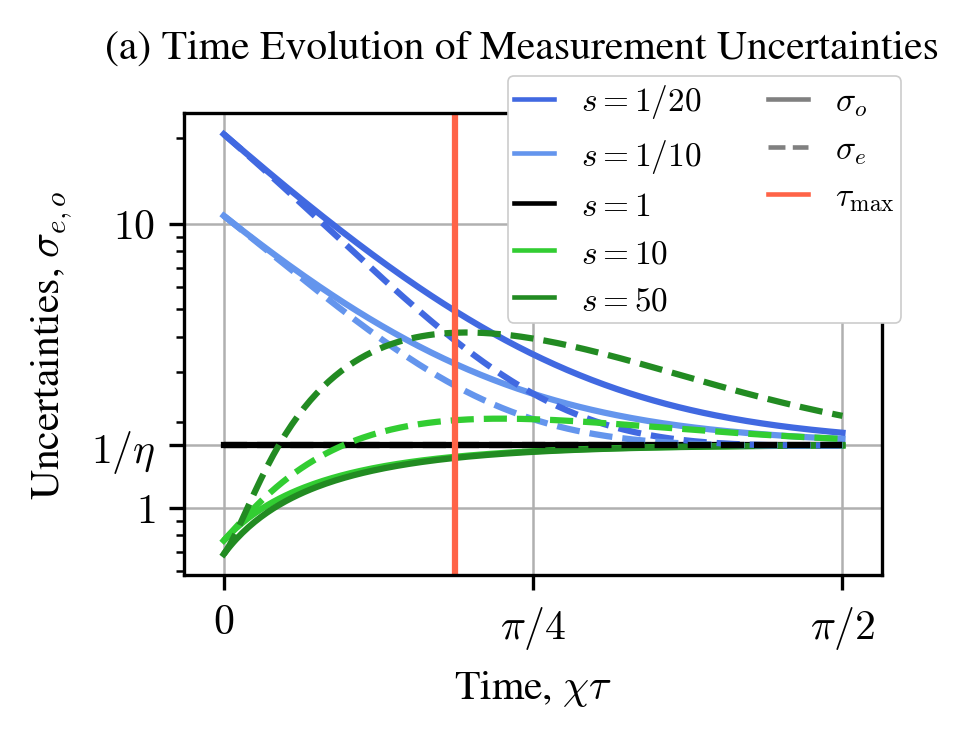

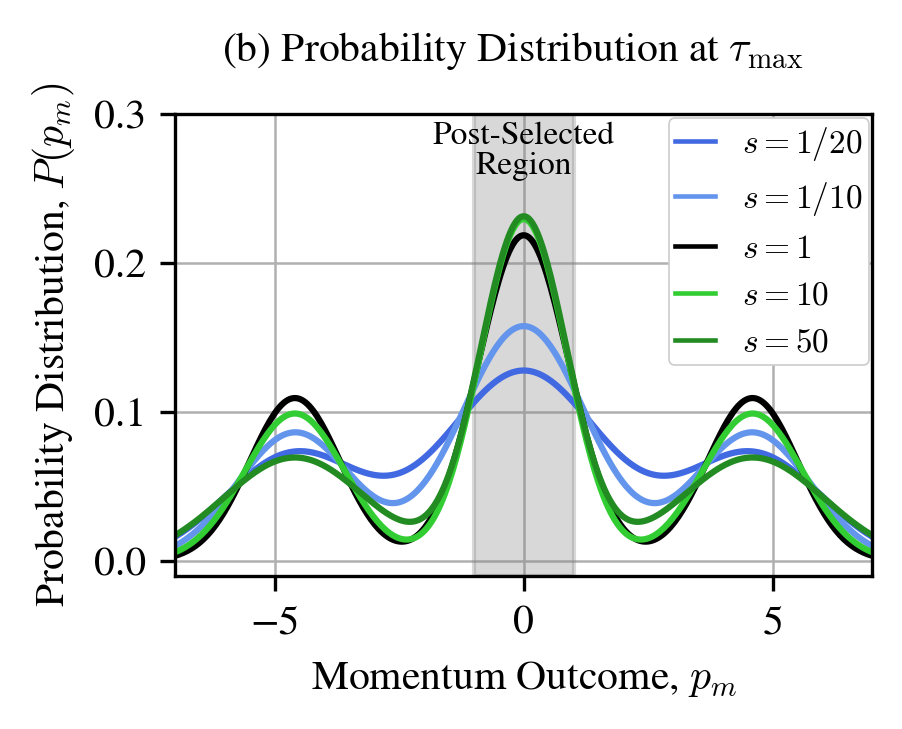

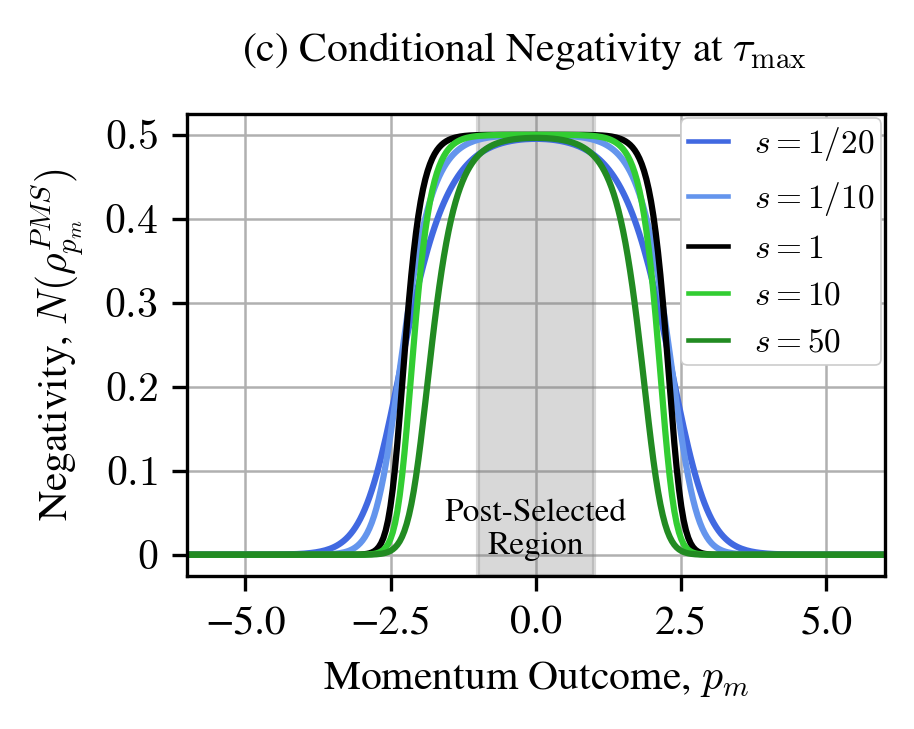

In [17]:
def plot_sigma_measurements(sigma_e, sigma_o, s_array, t_array, lables, save):
    """
    Plot entanglement (y axis) against time (x axis) for different spins both parallel and perpendicular setup:
    Inputs:
    time_array             Array of times 
    time_evolution_perp    matrix of entanglement perpendicolar (dim = len(spins) x len(time_array))
    time_evolution_para    matrix of entanglement parallel (dim = len(spins) x len(time_array))
    spins                  List of spins (Js)
    title                  Title of the plot
    yaxis                  Y axis label
    save                   If False doesn't save, otherwise string of figure save 
    Return: 
    """
    fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi = 300)
    
    colors_green = ['lightgreen', 'limegreen' , 'forestgreen', 'green', 'darkgreen']
    colors_blue = ['cornflowerblue', 'royalblue', 'blue','darkblue']
    colors_red = ['salmon','tomato','orangered','red','darkred']
    
    colors = ['royalblue', 'cornflowerblue' ,'black','limegreen' , 'forestgreen']


    rcParams['mathtext.fontset'] = 'cm'
    rcParams['font.family'] = 'STIXGeneral'

    linestyles = ['-','--']


    #ax.axhline(y = 1, color='black', zorder = -1 ,linewidth=1.3)

    for j in range(2):
        for i in range(len(s_array)):

            if j == 0:
                ax.plot(t_array, sigma_o[i], color=colors[i], linestyle=linestyles[j], label= lables[i])
            else:
                ax.plot(t_array, sigma_e[i], color=colors[i], linestyle=linestyles[j] )




    ax.plot([-0.3,-0.3], [1,1], '-', color='gray', label=r'$\sigma_o$')
    ax.plot([-0.3,-0.3], [1,1], '--', color='gray', label=r'$\sigma_e$')

    ax.axvline(x=np.arctan(2*chi/kappa),color='tomato',label=r'$\tau_{\text{max}}$')
    
    #ax.plot([-0.2,-0.3], [1,1], '--', color='gray', label=r'Diffuive Dynamics')
    
    
    ax.set_xlim(-0.1,t_array[-1]+0.1)
    ax.set_yscale('log')

    #ax.set_ylim(-0.3,4)

    ax.set_yticks([1,1/eta, 10], minor=False)
    ax.set_yticklabels([r'$1$',r'$1/\eta$', r'$10$'], fontsize=10)
    #ax.set_yticklabels([r'$0$', r'$0.5$'], fontsize=10)
    
    #ax.axvline(x = g_grav, color=colors_red[2], label= r'$g_G \approx 10^{%.0f} $' % orderOfMagnitude(g_grav),linewidth=1.2  )
    #ax.axhline(y = 0, color='black', zorder = 11 ,linewidth=1.3)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.grid(zorder=0, linewidth=0.6)
    #ax.set_xlim(-0.1*chi_array[-1], (2*np.pi+0.1)*theta_array[-1])
    #ax.set_ylim(-0.05, 0.55)
    ax.set_ylabel(r'Uncertainties, $\sigma_{e,o}$', fontsize=10)
    ax.set_xlabel(r'Time, $\chi \tau$', fontsize=10)
    ax.set_axisbelow(True)

    #ax.set_yticks(np.array([4,3,2,1,0]) )
    ax.set_xticks(np.array([0,1/4*np.pi, 1/2*np.pi])/(chi))
    ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$'])
    fig.suptitle('(a) Time Evolution of Measurement Uncertainties', fontsize=10, y =1.02)
    

    handles, labels = ax.get_legend_handles_labels()
    empty = plt.Line2D([], [], color="none")

    # Append two empty lines
    handles.extend([empty, empty])
    labels.extend(["", ""])

    leg =fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.94, 0.97), fontsize=8,labelspacing=0.5,handlelength=1.2,borderpad=0.2,ncols=2)
    for line in leg.get_lines():
        line.set_linewidth(1.1)
    leg.get_frame().set_linewidth(0.4)
    leg.get_frame().set_alpha(None)
    leg.get_frame().set_facecolor((1, 1, 1, 1.))
    
    if save == False:
        return 
    else: 
        plt.savefig(save, bbox_inches='tight')
        return

def plot_prob_dis(prob_dis_array, s_array, r_measure_array, lables, save):
    """
    Plot entanglement (y axis) against time (x axis) for different spins both parallel and perpendicular setup:
    Inputs:
    time_array             Array of times 
    time_evolution_perp    matrix of entanglement perpendicolar (dim = len(spins) x len(time_array))
    time_evolution_para    matrix of entanglement parallel (dim = len(spins) x len(time_array))
    spins                  List of spins (Js)
    title                  Title of the plot
    yaxis                  Y axis label
    save                   If False doesn't save, otherwise string of figure save 
    Return: 
    """
    fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi = 300)
    
    colors_green = ['lightgreen', 'limegreen' , 'forestgreen', 'green', 'darkgreen']
    colors_blue = ['cornflowerblue', 'royalblue', 'blue','darkblue']
    colors_red = ['salmon','tomato','orangered','red','darkred']
    
    colors = ['royalblue', 'cornflowerblue' ,'black','limegreen' , 'forestgreen']


    rcParams['mathtext.fontset'] = 'cm'
    rcParams['font.family'] = 'STIXGeneral'

    #ax.axhline(y = 1, color='black', zorder = -1 ,linewidth=1.3)

    for i in range(len(s_array)):
        ax.plot(r_measure_array,prob_dis_array[i], color=colors[i],  label= lables[i])



    ax.set_xlim(-7,7)
    ax.set_ylim(-0.01,0.3)

    #ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5], minor=False)
    #ax.set_yticklabels([r'$0$',r'$0.1$', r'$0.2$',r'$0.3$',r'$0.4$', r'$0.5$'], fontsize=10)
    #ax.set_yticklabels([r'$0$', r'$0.5$'], fontsize=10)
    
    #ax.axvline(x = g_grav, color=colors_red[2], label= r'$g_G \approx 10^{%.0f} $' % orderOfMagnitude(g_grav),linewidth=1.2  )
    #ax.axhline(y = 0, color='black', zorder = 11 ,linewidth=1.3)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.grid(zorder=0, linewidth=0.6)
    #ax.set_xlim(-0.1*chi_array[-1], (2*np.pi+0.1)*theta_array[-1])
    #ax.set_ylim(-0.05, 0.55)
    ax.set_ylabel(r'Probability Distribution, $P(p_m)$', fontsize=10)
    ax.set_xlabel(r'Momentum Outcome, $p_m$', fontsize=10)
    ax.set_axisbelow(True)

    #ax.set_yticks(np.array([4,3,2,1,0]) )
    #ax.set_xticks(np.array([0,1/4*np.pi, 1/2*np.pi])/(chi))
    #ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$'])
    fig.suptitle(r'(b) Probability Distribution at $\tau_{\text{max}}$', fontsize=10, y =1.02)

    ax.axvspan(-1, 1, color="gray", alpha=0.3)
    ax.text(0, 0.285, "Post-Selected",ha="center", va="center", fontsize=8, color="black")
    ax.text(0, 0.265, "Region",ha="center", va="center", fontsize=8, color="black")
    

    handles, labels = ax.get_legend_handles_labels()
    leg =fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.915, 0.9), fontsize=8,labelspacing=0.5,handlelength=1.2,borderpad=0.2,ncols=1)
    for line in leg.get_lines():
        line.set_linewidth(1.1)
    leg.get_frame().set_linewidth(0.4)
    leg.get_frame().set_alpha(None)
    leg.get_frame().set_facecolor((1, 1, 1, 1.))
    
    if save == False:
        return 
    else: 
        plt.savefig(save, bbox_inches='tight')
        return
    
def plot_nega(prob_dis_array, s_array, r_measure_array, lables, save):
    """
    Plot entanglement (y axis) against time (x axis) for different spins both parallel and perpendicular setup:
    Inputs:
    time_array             Array of times 
    time_evolution_perp    matrix of entanglement perpendicolar (dim = len(spins) x len(time_array))
    time_evolution_para    matrix of entanglement parallel (dim = len(spins) x len(time_array))
    spins                  List of spins (Js)
    title                  Title of the plot
    yaxis                  Y axis label
    save                   If False doesn't save, otherwise string of figure save 
    Return: 
    """
    fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi = 300)
    
    colors_green = ['lightgreen', 'limegreen' , 'forestgreen', 'green', 'darkgreen']
    colors_blue = ['cornflowerblue', 'royalblue', 'blue','darkblue']
    colors_red = ['salmon','tomato','orangered','red','darkred']
    
    colors = ['royalblue', 'cornflowerblue' ,'black','limegreen' , 'forestgreen']


    rcParams['mathtext.fontset'] = 'cm'
    rcParams['font.family'] = 'STIXGeneral'

    #ax.axhline(y = 1, color='black', zorder = -1 ,linewidth=1.3)

    for i in range(len(s_array)):
        ax.plot(r_measure_array,prob_dis_array[i], color=colors[i],  label= lables[i])



    #ax.set_ylim(-0.3,4)

    ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5], minor=False)
    ax.set_yticklabels([r'$0$',r'$0.1$', r'$0.2$',r'$0.3$',r'$0.4$', r'$0.5$'], fontsize=10)
    #ax.set_yticklabels([r'$0$', r'$0.5$'], fontsize=10)
    
    #ax.axvline(x = g_grav, color=colors_red[2], label= r'$g_G \approx 10^{%.0f} $' % orderOfMagnitude(g_grav),linewidth=1.2  )
    #ax.axhline(y = 0, color='black', zorder = 11 ,linewidth=1.3)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.grid(zorder=0, linewidth=0.6)
    #ax.set_xlim(-0.1*chi_array[-1], (2*np.pi+0.1)*theta_array[-1])
    #ax.set_ylim(-0.05, 0.55)
    ax.set_ylabel(r'Negativity, $N(\rho_{p_m}^{PMS})$', fontsize=10)
    ax.set_xlabel(r'Momentum Outcome, $p_m$', fontsize=10)
    ax.set_axisbelow(True)

    #ax.set_yticks(np.array([4,3,2,1,0]) )
    #ax.set_xticks(np.array([0,1/4*np.pi, 1/2*np.pi])/(chi))
    #ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$'])
    fig.suptitle(r'(c) Conditional Negativity at $\tau_{\text{max}}$', fontsize=10, y =1.02)

    ax.set_xlim(-6,6)
    

    handles, labels = ax.get_legend_handles_labels()

    ax.axvspan(-1, 1, color="gray", alpha=0.3)

    ax.text(0, 0.05, "Post-Selected",ha="center", va="center", fontsize=8, color="black")
    ax.text(0, 0.01, "Region",ha="center", va="center", fontsize=8, color="black")
  
    leg =fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.915, 0.9), fontsize=8,labelspacing=0.5,handlelength=1.2,borderpad=0.2,ncols=1)
    for line in leg.get_lines():
        line.set_linewidth(1.1)
    leg.get_frame().set_linewidth(0.4)
    leg.get_frame().set_alpha(None)
    leg.get_frame().set_facecolor((1, 1, 1, 1.))
    
    if save == False:
        return 
    else: 
        plt.savefig(save, bbox_inches='tight')
        return
    

plot_sigma_measurements(sigma_e_analytical, sigma_o_analytical, s_array, t_array,lables, False)
plot_prob_dis(prob_dis_array, s_array, r_measure_array,lables, False)
plot_nega(- nega_array, s_array, r_measure_array,lables, False)